<a href="https://colab.research.google.com/github/alu0100880755/Logistica/blob/master/TSP_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Distancia total de la ruta =  146.0 kilometros

Ruta de distancia mínima:

	De 0 a 3 con distancia = 11 Km
	De 1 a 6 con distancia = 32 Km
	De 2 a 14 con distancia = 10 Km
	De 3 a 9 con distancia = 5 Km
	De 4 a 13 con distancia = 9 Km
	De 5 a 11 con distancia = 5 Km
	De 6 a 7 con distancia = 5 Km
	De 7 a 10 con distancia = 1 Km
	De 8 a 5 con distancia = 30 Km
	De 9 a 8 con distancia = 2 Km
	De 10 a 0 con distancia = 6 Km
	De 11 a 12 con distancia = 2 Km
	De 12 a 2 con distancia = 10 Km
	De 13 a 1 con distancia = 11 Km
	De 14 a 4 con distancia = 7 Km

	DATOS DE INTERES

Tiempo Empleado:  120  milisegundos, |  0.12  segundos |  0.0  minutos 
Iteraciones:  0
Nodos:  0


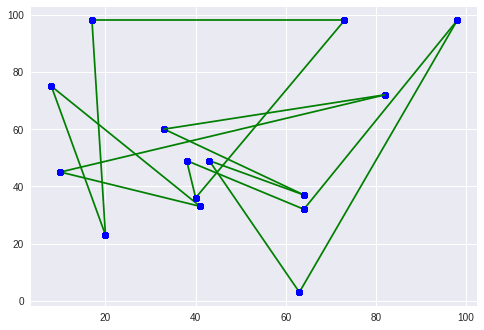

In [1]:
#Instalamos lo necesario
!pip install ortools
from ortools.linear_solver import pywraplp

#Importamos las librerías necesarias
import random
import math
import matplotlib.pyplot as plt

#Declaramos las variables
n = 15
todos = range(n)
otros = range(1,n)

#Semilla para que empiece por un punto similar siempre y poder comparar con varios modelos
random.seed(8888)

points = [(random.randint(0,100),random.randint(0,100)) for i in range(n)]
dist= { (i,j) : random.randint(1,100) for i in todos for j in todos if i!=j }


#Precisión
EPS = 0.001


#####################################################

    #Muestreo de grafos

#Dibujar una ruta dada como una lista de arcos
def dibuja(selected):                
    plt.plot([p[0] for p in points], [p[1] for p in points], 'bo')
    for (i,j) in selected:
        plt.plot([points[i][0],points[j][0]], [points[i][1],points[j][1]], 'g-')

######################################################


def TSP_3():
    solver = pywraplp.Solver('TSP', pywraplp.Solver.CBC_MIXED_INTEGER_PROGRAMMING)

    #VARIABLES
    
    #Arcos elegidos
    x = {}
    
    for i in todos:
        for j in todos:
            if i!=j:
                x[i,j] = solver.BoolVar('x[%i,%i]' % (i,j))
     
    #Cantidad de euros que llevar
    f = {}
    
    for i in todos:
        for j in todos:
            if i!=j:
                f[i,j] = solver.IntVar(0.0, solver.infinity(), 'f[%d,%d]'%(i,j))
                
 
    
    #Función objetivo
    solver.Minimize(solver.Sum( dist[i,j]*x[i,j] for i in todos for j in todos if i!=j ))
    
    #Restricciones
    [ solver.Add(  solver.Sum(x[i,j] for j in todos if i!=j) == 1  )  for i in todos ]
    [ solver.Add(  solver.Sum(x[j,i] for j in todos if i!=j) == 1  )  for i in todos ]
    
    [ solver.Add(  solver.Sum(f[j,i]-f[i,j] for j in todos if j!=i) >= 1 ) for i in otros  ]    
    [ solver.Add(  f[i,j] <= (n-1) * x[i,j] ) for i in todos for j in otros if i!=j ]
    
    solver.Solve()

   
    print('\nDistancia total de la ruta = ', solver.Objective().Value(),'kilometros')
    print('\nRuta de distancia mínima:\n')
    for i in todos:
        for j in todos: 
            if i!=j and x[i,j].solution_value() > EPS :
                print('\tDe %d a %d con distancia = %d Km'  % (i,j,dist[i,j]))
                dibuja({(i,j): dist[i,j]}) #Mostrar la ruta
    
    
    #Muestreo de datos
    
    print("\n\tDATOS DE INTERES")

    milisegundos = solver.WallTime()
    segundos = round((milisegundos/1000),2)
    minutos = round((segundos/60),2)
    print("\nTiempo Empleado: ", milisegundos, " milisegundos, | ", segundos , " segundos | ", minutos, " minutos ")
    print("Iteraciones: ", solver.Iterations())
    print("Nodos: ", solver.nodes())
     
    
    
TSP_3()


